# Filling missing value by mean,media,mode

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\HAROON\DATA SCIENCE\IndianAiProduction\04_Dataprocessing&FE\data\train.csv')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100
missing_value_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [7]:
missing_value_col_gre_20 = missing_value_per[missing_value_per > 20].keys()
missing_value_col_gre_20

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
df2_drop_col = df.drop(columns=missing_value_col_gre_20)
df2_drop_col.shape

(1460, 76)

In [9]:
df3_num = df2_drop_col.select_dtypes(include=['int', 'float'])
df3_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


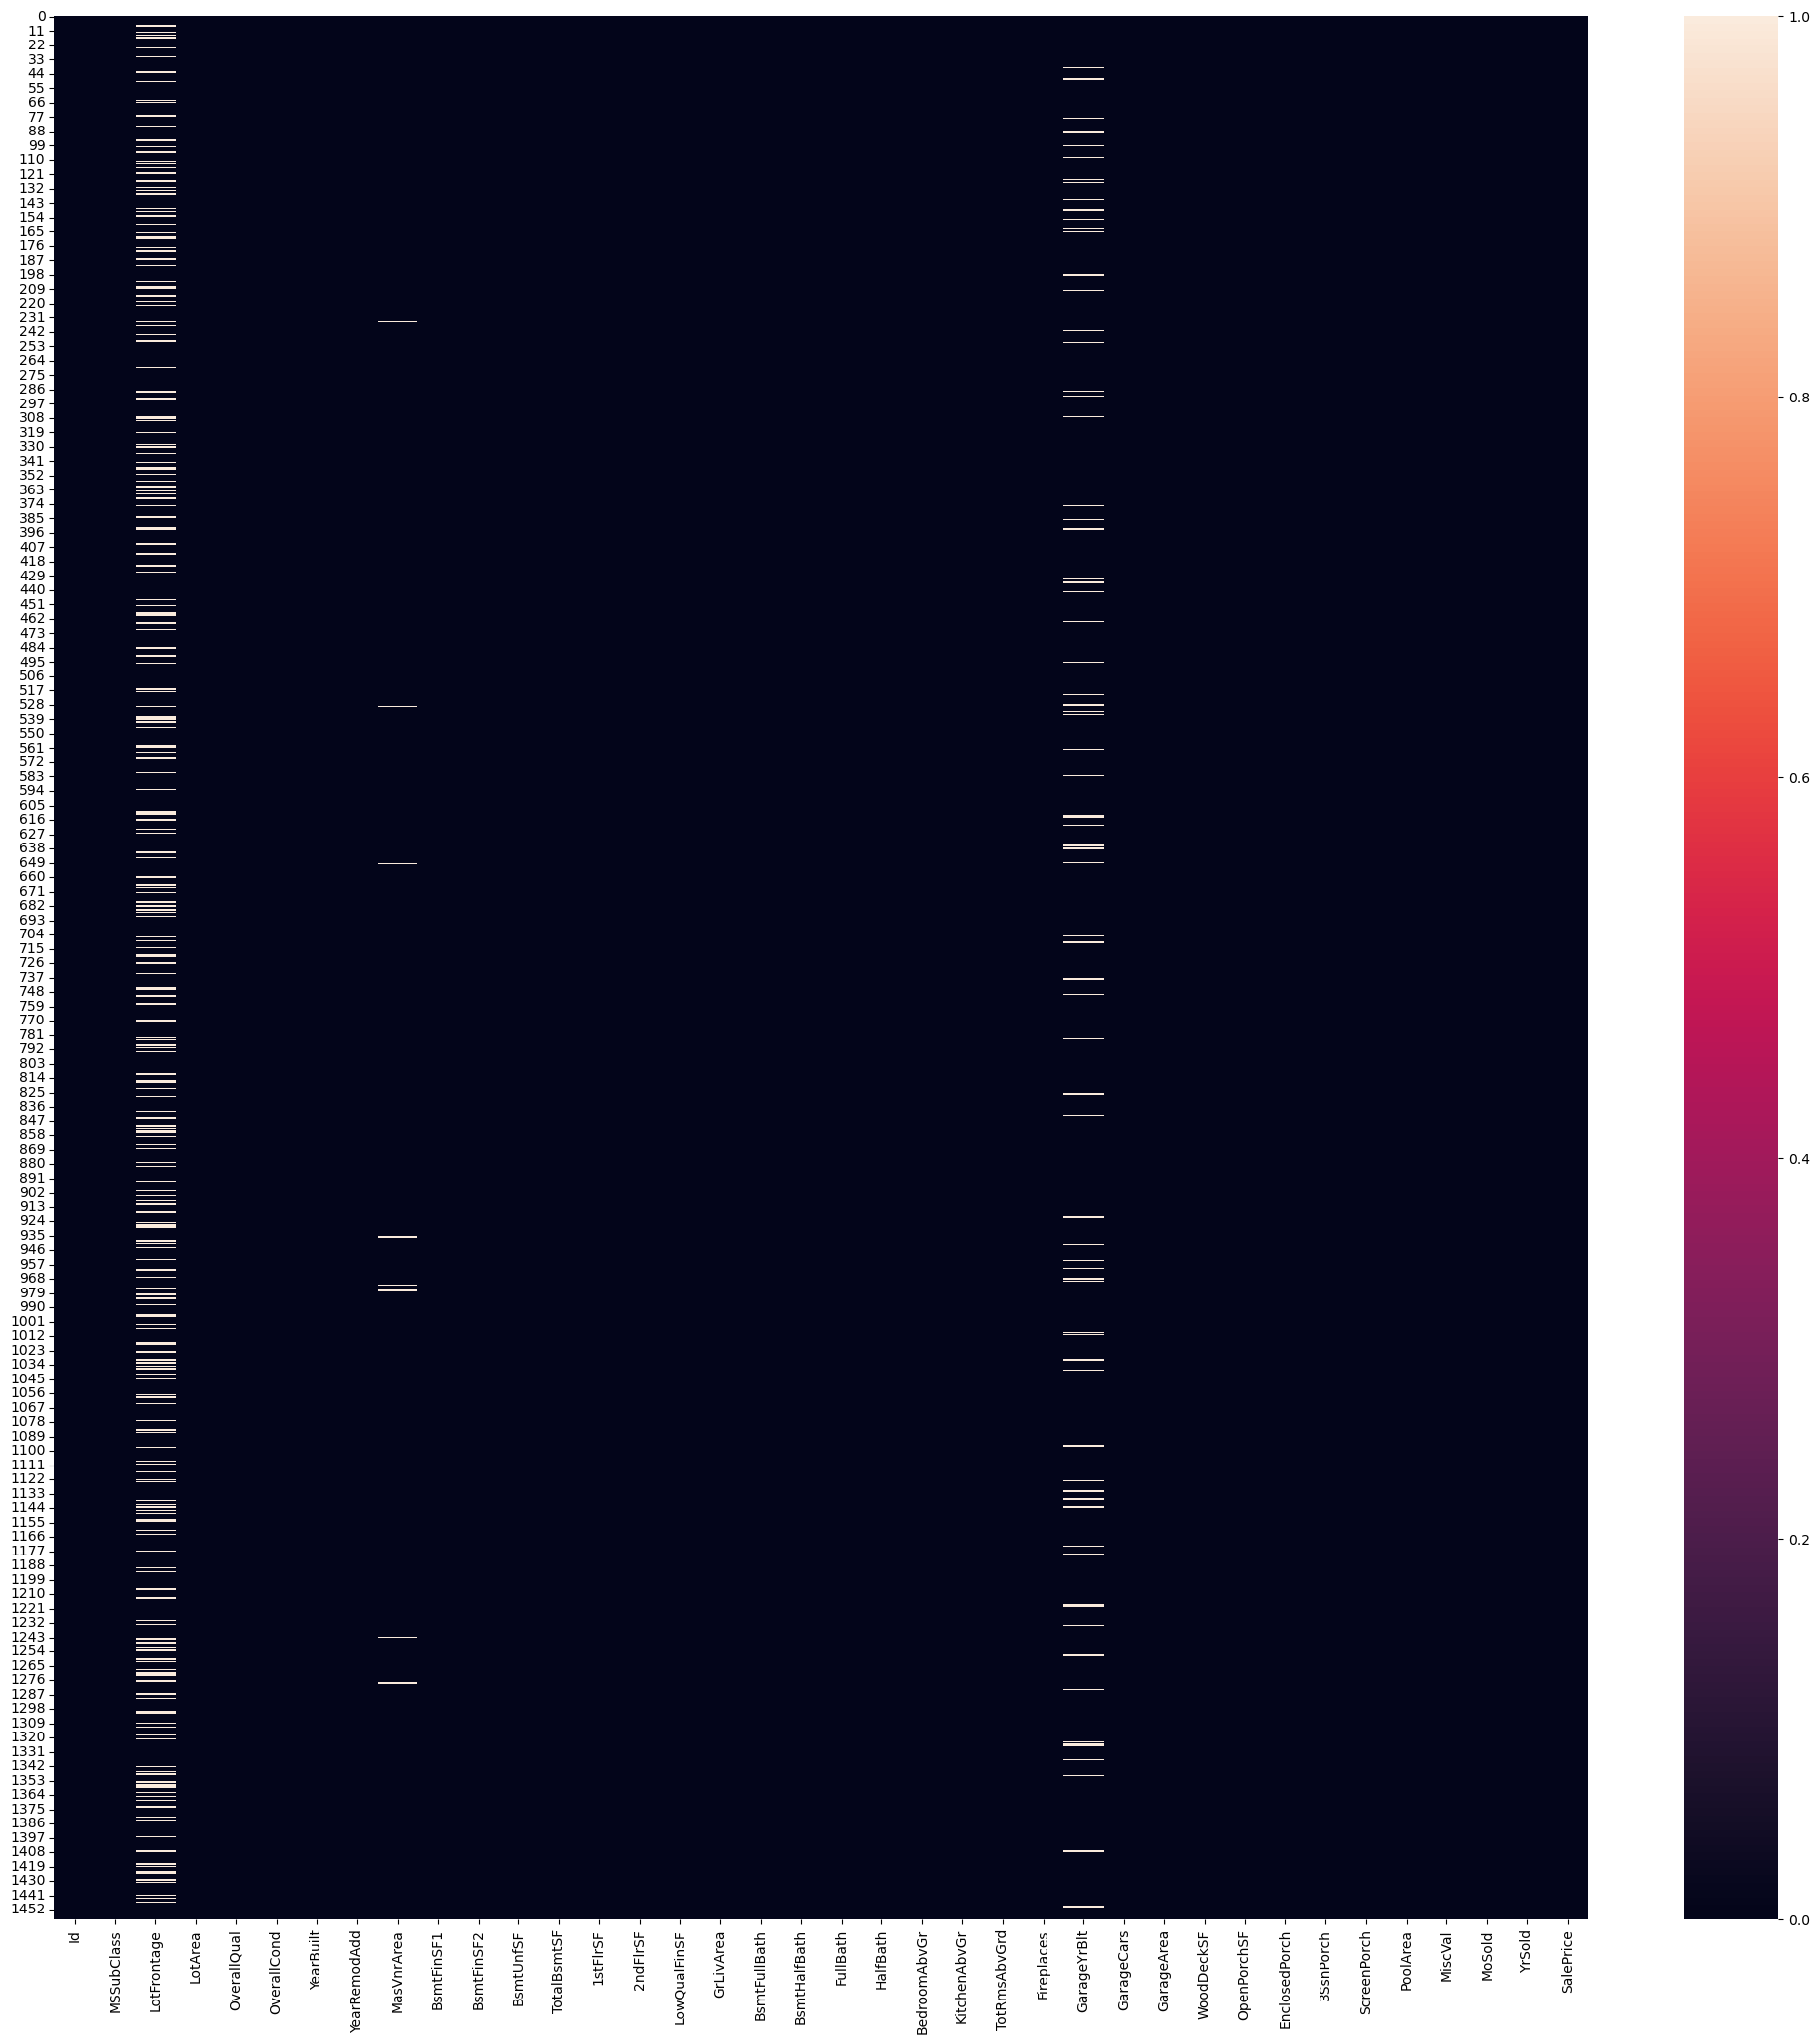

In [10]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_num.isnull())
plt.show()

In [11]:
df3_num[df3_num.isnull().any(axis=1)]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,0,175,912,912,0,0,912,1,0,1,0,2,1,4,0,1962.0,1,352,140,0,0,0,176,0,0,9,2008,144000
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,0,520,1253,1253,0,0,1253,1,0,1,1,2,1,5,1,1960.0,1,352,0,213,176,0,0,0,0,5,2008,157000
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,0,426,1004,1004,0,0,1004,1,0,1,0,2,1,5,1,1970.0,2,480,0,0,0,0,0,0,700,3,2010,149000
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,668,204,1060,1060,0,0,1060,1,0,1,0,3,1,6,1,1968.0,1,270,406,90,0,0,0,0,0,5,2010,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,30,NaN,8854,6,6,1916,1950,0.0,0,0,952,952,952,0,0,952,0,0,1,0,2,1,4,1,1916.0,1,192,0,98,0,0,40,0,0,5,2009,121000
1446,1447,20,NaN,26142,5,7,1962,1962,189.0,593,0,595,1188,1188,0,0,1188,0,0,1,0,3,1,6,0,1962.0,1,312,261,39,0,0,0,0,0,4,2010,157900
1449,1450,180,21.0,1533,5,7,1970,1970,0.0,553,0,77,630,630,0,0,630,1,0,1,0,1,1,3,0,NaN,0,0,0,0,0,0,0,0,0,8,2006,92000
1450,1451,90,60.0,9000,5,5,1974,1974,0.0,0,0,896,896,896,896,0,1792,0,0,2,2,4,2,8,0,NaN,0,0,32,45,0,0,0,0,0,9,2009,136000


In [14]:
df3_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [15]:
missing_num_var = [i for i in df3_num.columns if df3_num[i].isnull().sum() > 0]
missing_num_var

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

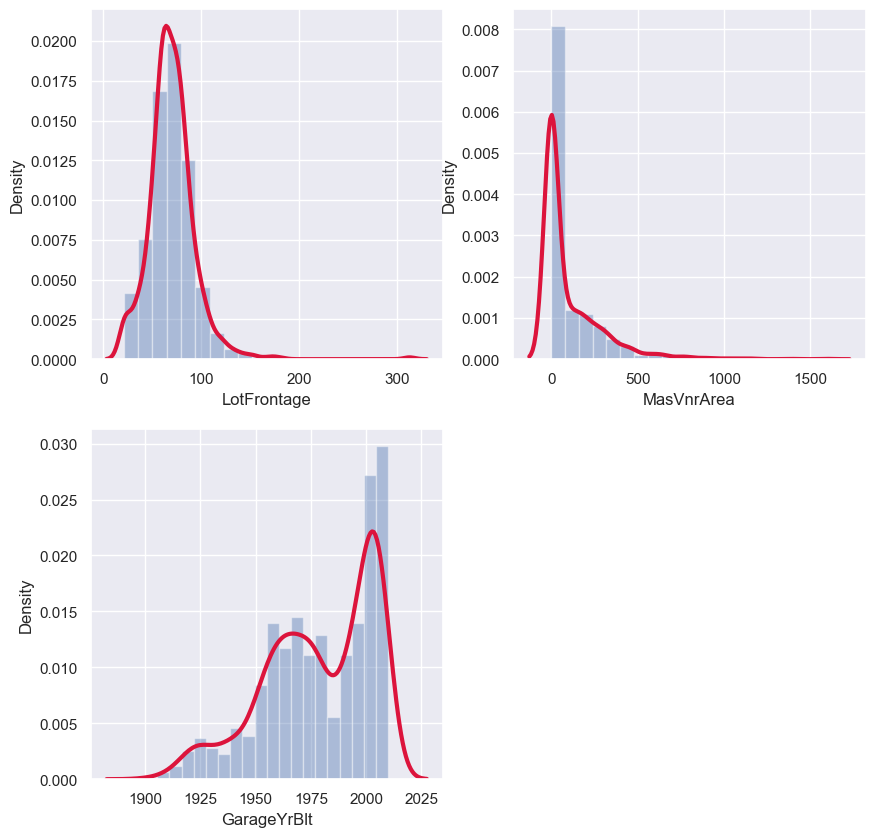

In [25]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20,kde_kws={'linewidth':3, 'color':'#DC143C'})

In [27]:
df4_num_mean = df3_num.fillna(df3_num.mean())
df4_num_mean.isnull().sum().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

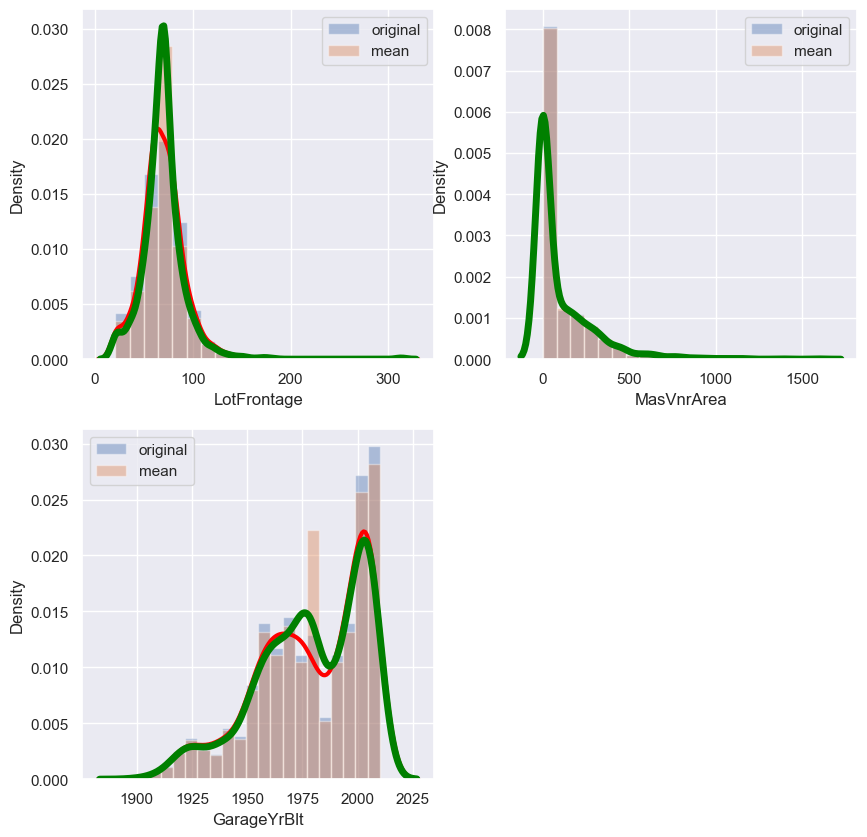

In [28]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20,kde_kws={'linewidth':3, 'color':'red'},label="original")
    sns.distplot(df4_num_mean[var], bins=20,kde_kws={'linewidth':5, 'color':'green'},label="mean")
    plt.legend()

In [29]:
df5_num_median = df3_num.fillna(df3_num.median())
df5_num_median.isnull().sum().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

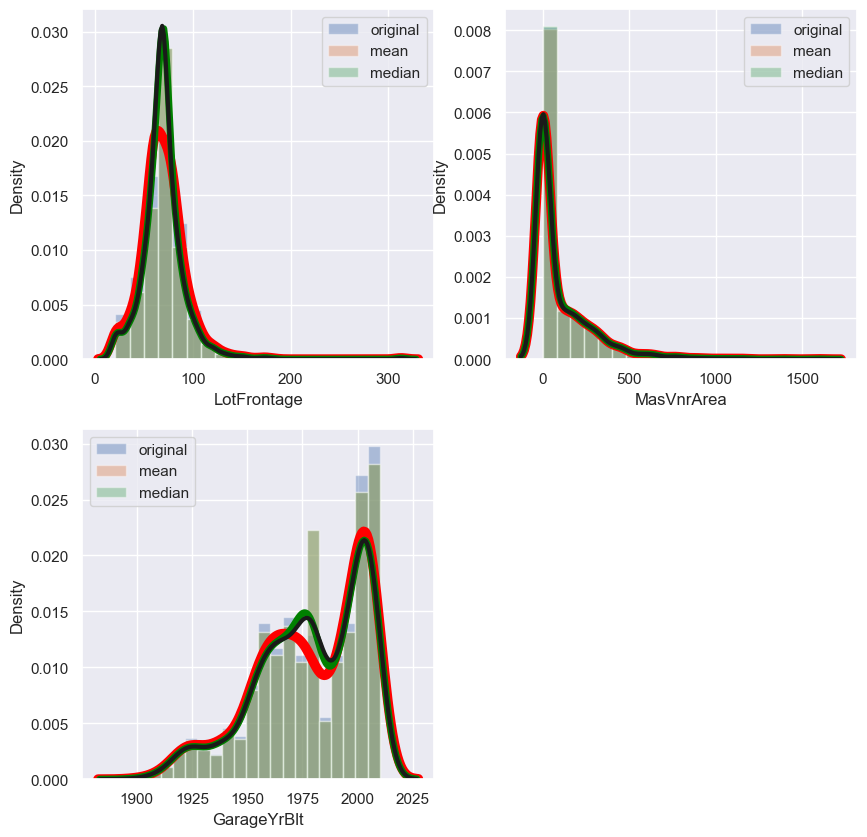

In [32]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20,kde_kws={'linewidth':7, 'color':'red'},label="original")
    sns.distplot(df4_num_mean[var], bins=20,kde_kws={'linewidth':5, 'color':'green'},label="mean")
    sns.distplot(df5_num_median[var], bins=20,kde_kws={'linewidth':3, 'color':'k'},label="median")
    plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

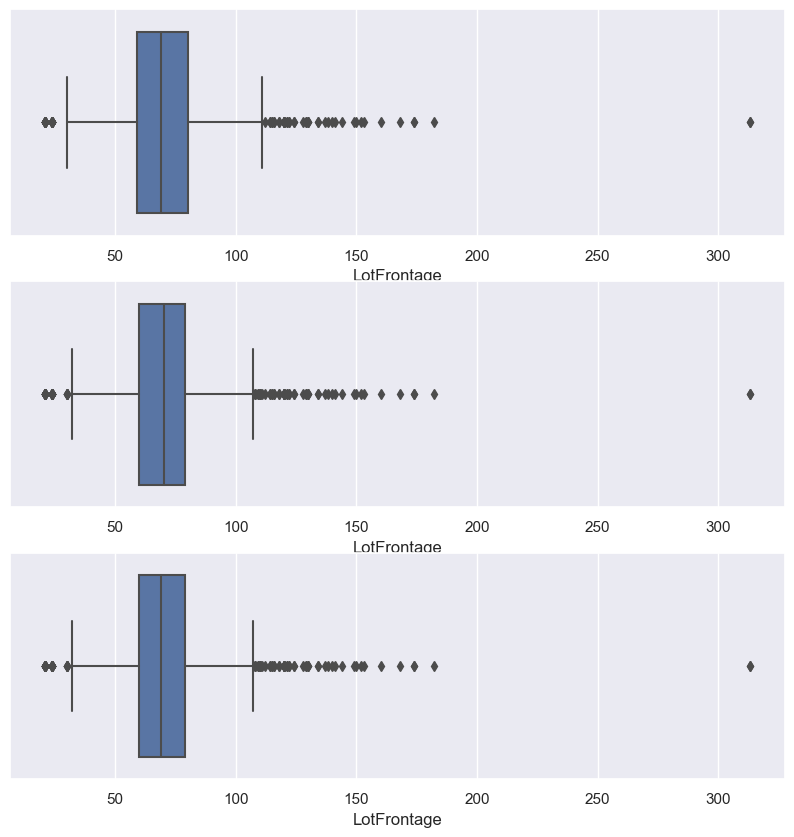

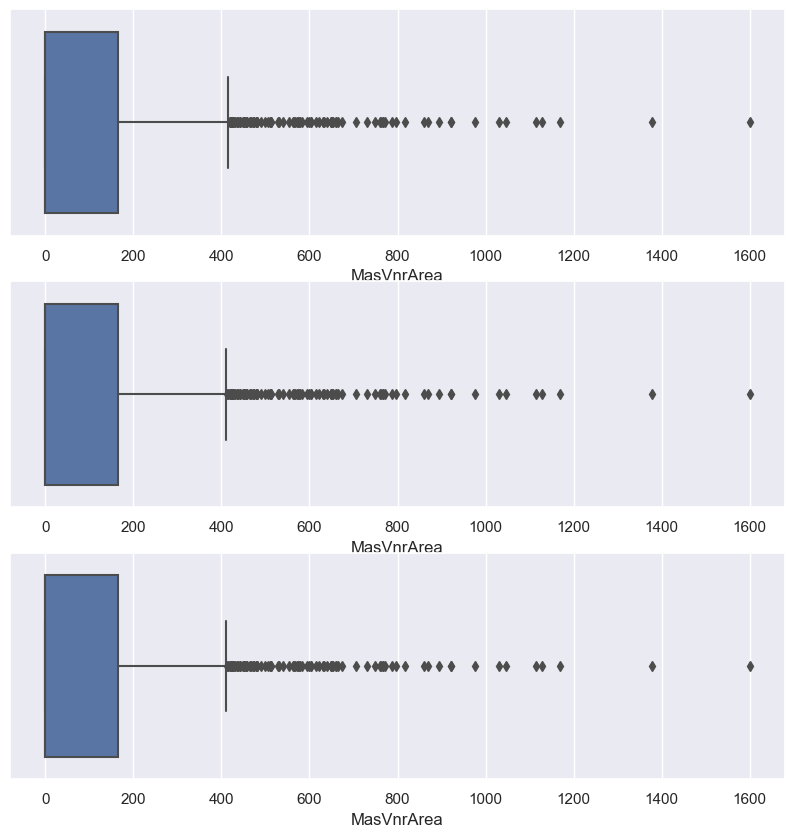

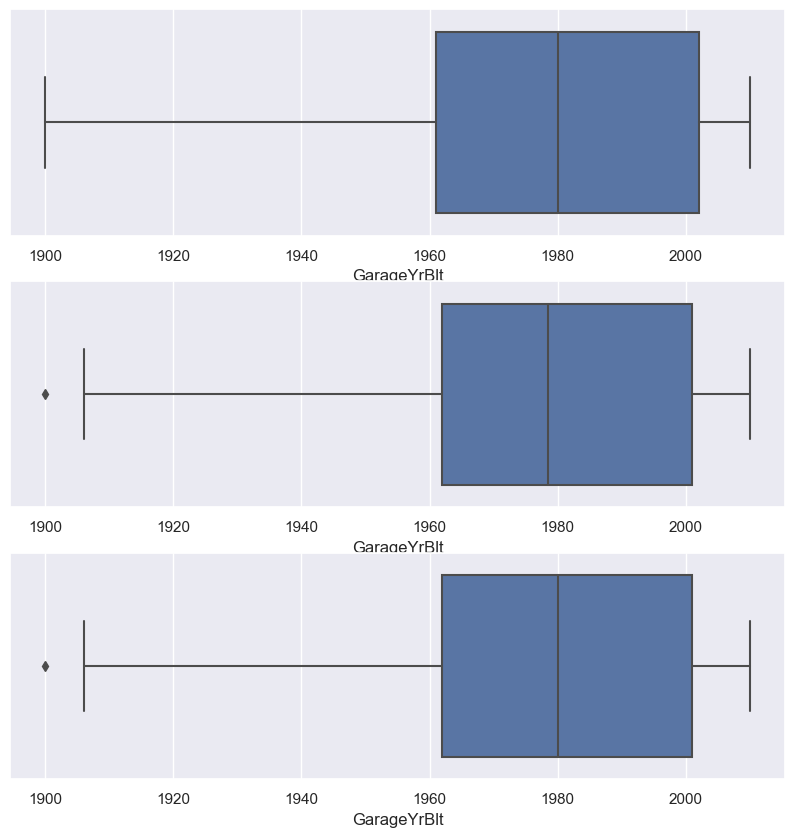

In [35]:
for i,var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df4_num_mean[var])
    plt.subplot(3,1,3)
    sns.boxplot(df5_num_median[var])

In [46]:
df_concat = pd.concat([df3_num[missing_num_var], df4_num_mean[missing_num_var], df5_num_median[missing_num_var]], axis=1)
df_concat

,LotFrontage,MasVnrArea,GarageYrBlt,LotFrontage,MasVnrArea,GarageYrBlt,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0,65.0,196.0,2003.0,65.0,196.0,2003.0
1,80.0,0.0,1976.0,80.0,0.0,1976.0,80.0,0.0,1976.0
2,68.0,162.0,2001.0,68.0,162.0,2001.0,68.0,162.0,2001.0
3,60.0,0.0,1998.0,60.0,0.0,1998.0,60.0,0.0,1998.0
4,84.0,350.0,2000.0,84.0,350.0,2000.0,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,1999.0,62.0,0.0,1999.0,62.0,0.0,1999.0
1456,85.0,119.0,1978.0,85.0,119.0,1978.0,85.0,119.0,1978.0
1457,66.0,0.0,1941.0,66.0,0.0,1941.0,66.0,0.0,1941.0
1458,68.0,0.0,1950.0,68.0,0.0,1950.0,68.0,0.0,1950.0


In [49]:
df_concat[df_concat.isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt,LotFrontage,MasVnrArea,GarageYrBlt,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0,70.049958,240.0,1973.000000,69.0,240.0,1973.0
12,NaN,0.0,1962.0,70.049958,0.0,1962.000000,69.0,0.0,1962.0
14,NaN,212.0,1960.0,70.049958,212.0,1960.000000,69.0,212.0,1960.0
16,NaN,180.0,1970.0,70.049958,180.0,1970.000000,69.0,180.0,1970.0
24,NaN,0.0,1968.0,70.049958,0.0,1968.000000,69.0,0.0,1968.0
...,...,...,...,...,...,...,...,...,...
1443,NaN,0.0,1916.0,70.049958,0.0,1916.000000,69.0,0.0,1916.0
1446,NaN,189.0,1962.0,70.049958,189.0,1962.000000,69.0,189.0,1962.0
1449,21.0,0.0,NaN,21.000000,0.0,1978.506164,21.0,0.0,1980.0
1450,60.0,0.0,NaN,60.000000,0.0,1978.506164,60.0,0.0,1980.0
